POSTOVANJE, U OVOM PROJEKTU SAM ODRADIO PRVO POVEZIVANJE SA GOOGLE DRIVEOM, NISAM DODAO DATASET NA KLASICAN NACIN KAO STO SE MOGLO JER MOJ DATASET IMA OKO 80 MB PA PREKO GOODLE DRIVE RADI NA BRZI I BOLJI NACIN, NAKON TOGA SAM ODRADIO GENERAL INFO O DATASETU, DODAO PAR VIZUALNIH PRIKAZA, CHARTOVA,KAKO SE DIJELI DATASET NA (POSITIVE I NEGATIVE), NAKON TOGA SAM ODRADIO CLEANING TEXT & PREPROCESSING, POSLE TOGA MODELI, URADIO SAM 3 MODELA, 2 MODERNA I 1 TRADICIONALNI, JEDINO BERTOV IMA JEDAN MALI PROBLEM JER BERT-OV TENSOR FLOW VERZIJA SE NE POKLAPA SA VERZIJOM TENSOR FLOWA MLPA MODELA PA JE ZBOG TOGA OVAJ ERROR PRI DNU, UGLAVNOM NJEGA CU RIJESITI DO DANAS, DODATI PIE PRIKAZ MODELA, KADA TO URADIM NA KRAJU CU JOS DODATI PIE PRIKAZ EFIKASNOSTI MLP MODELA I BERTA, DA SE VIDI KOJI JE USPENISJI OD TA DVA MODERNA MODELA, TAKODJE PORED NJIH SAM DODAO I LOGISTIC REGRESSION DA SE IMA.

Connecting Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/datasets/aclImdb_v1.tar.gz'
import tarfile

tar = tarfile.open(dataset_path, "r:gz")
tar.extractall(path="/content/aclImdb")
tar.close()




Mounted at /content/drive


/tmp/ipython-input-1293875281.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path="/content/aclImdb")


In [3]:
import os

base_dir = '/content/aclImdb/aclImdb'

texts = []
labels = []

for label_type in ['pos', 'neg']:
    dir_name = os.path.join(base_dir, 'train', label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                texts.append(f.read())
            labels.append(1 if label_type == 'pos' else 0)




/tmp/ipython-input-2286185311.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


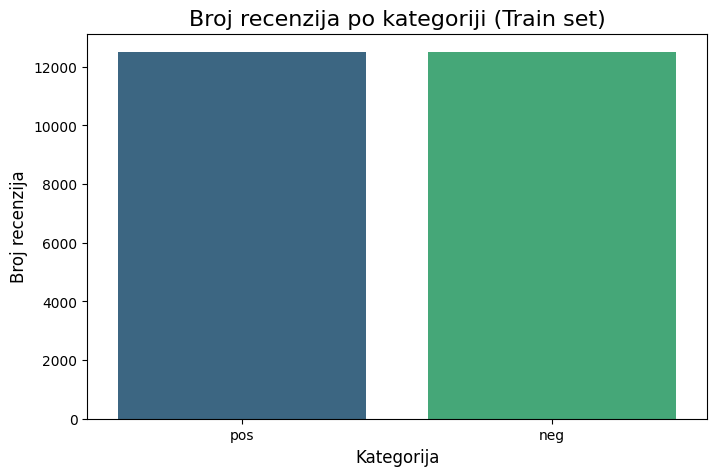

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Brojanje broja recenzija
base_dir = '/content/aclImdb/aclImdb/train'
categories = ['pos', 'neg']
counts = {}

for category in categories:
    dir_path = os.path.join(base_dir, category)
    counts[category] = len([fname for fname in os.listdir(dir_path) if fname.endswith('.txt')])

# Crtanje bar plot-a
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Broj recenzija po kategoriji (Train set)", fontsize=16)
plt.xlabel("Kategorija", fontsize=12)
plt.ylabel("Broj recenzija", fontsize=12)
plt.xticks(fontsize=10)
plt.show()


/tmp/ipython-input-2643029824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


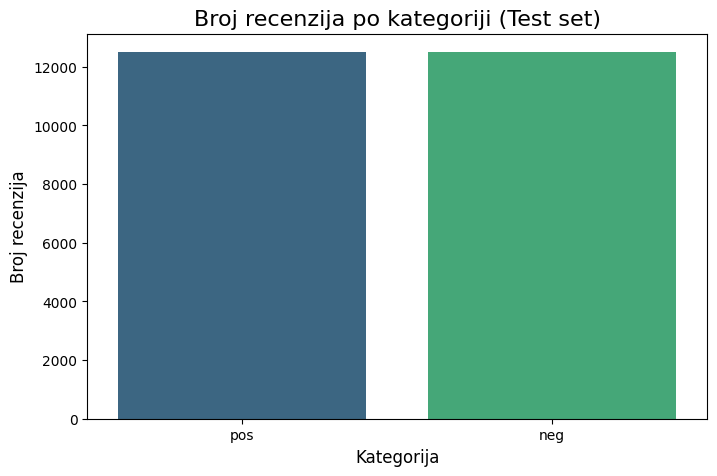

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Brojanje broja recenzija
base_dir = '/content/aclImdb/aclImdb/test'
categories = ['pos', 'neg']
counts = {}

for category in categories:
    dir_path = os.path.join(base_dir, category)
    counts[category] = len([fname for fname in os.listdir(dir_path) if fname.endswith('.txt')])

# Crtanje bar plot-a
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Broj recenzija po kategoriji (Test set)", fontsize=16)
plt.xlabel("Kategorija", fontsize=12)
plt.ylabel("Broj recenzija", fontsize=12)
plt.xticks(fontsize=10)
plt.show()


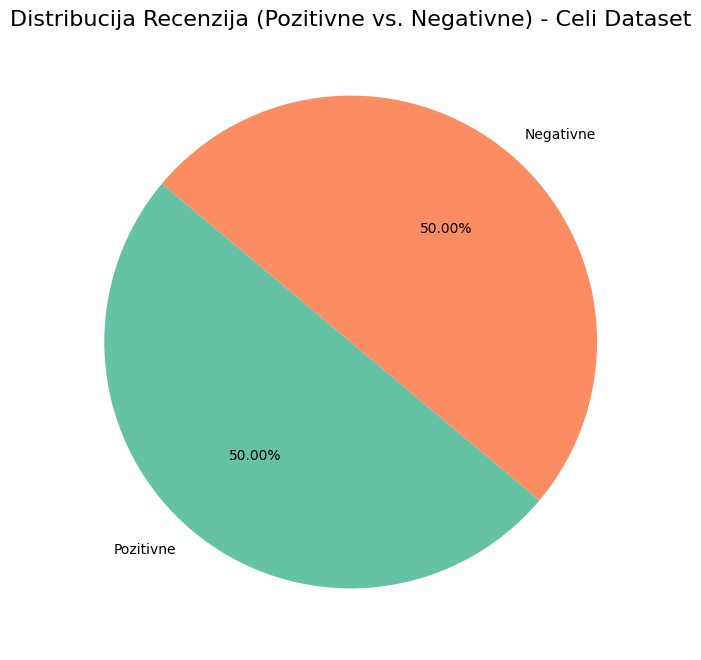

In [6]:
base_dirs = ['/content/aclImdb/aclImdb/train', '/content/aclImdb/aclImdb/test']
categories = ['pos', 'neg']
counts = {'pos': 0, 'neg': 0}

for base in base_dirs:
    for category in categories:
        dir_path = os.path.join(base, category)
        counts[category] += len([fname for fname in os.listdir(dir_path) if fname.endswith('.txt')])

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts.values(),
    labels=['Pozitivne', 'Negativne'],
    autopct='%0.2f%%',
    colors=['#66c2a5', '#fc8d62'],
    startangle=140
)
plt.title("Distribucija Recenzija (Pozitivne vs. Negativne) - Celi Dataset", fontsize=16)
plt.show()


General Info

In [7]:
import os
import pandas as pd

# Definisanje baze direktorijuma
base_dirs = ['/content/aclImdb/aclImdb/train', '/content/aclImdb/aclImdb/test']
categories = ['pos', 'neg']

# Prazne liste
texts = []
labels = []

# Čitanje svih review-ova
for base in base_dirs:
    for category in categories:
        dir_path = os.path.join(base, category)
        for fname in os.listdir(dir_path):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                    texts.append(f.read())
                labels.append(1 if category == 'pos' else 0)

# Kreiranje DataFrame-a
df = pd.DataFrame({'review': texts, 'label': labels})

print(f'Dataset shape: {df.shape}')
df.head()

# Broj karaktera
df['num_characters'] = df['review'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Broj reči
df['num_words'] = df['review'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Broj rečenica
df['num_sentences'] = df['review'].apply(lambda x: len(str(x).split('.')) if pd.notnull(x) else 0)


print(df[['review', 'num_characters', 'num_words', 'num_sentences']].head())




Dataset shape: (50000, 2)
                                              review  num_characters  \
0  This is not the stuff of soap-operas but the s...             235   
1  Passport to Pimlico is a real treat for all fa...            3057   
2  It has been some years since I saw this, but r...            1572   
3  I have been an admirer of Edward Burtynsky's w...             878   
4  1933 seemed to be a great year for satires ("D...             750   

   num_words  num_sentences  
0         40              3  
1        504             13  
2        309             20  
3        148              6  
4        134              7  


In [ ]:
# Statistički opis
print("\nOpis broja karaktera:")
print(df['num_characters'].describe())

print("\nOpis broja reči:")
print(df['num_words'].describe())

print("\nOpis broja rečenica:")
print(df['num_sentences'].describe())



Opis broja karaktera:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: num_characters, dtype: float64

Opis broja reči:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: num_words, dtype: float64

Opis broja rečenica:
count    50000.000000
mean        14.010400
std          9.890968
min          1.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        176.000000
Name: num_sentences, dtype: float64


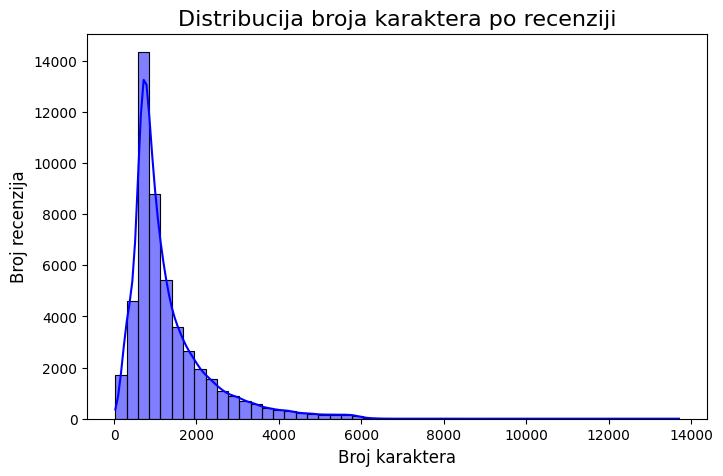

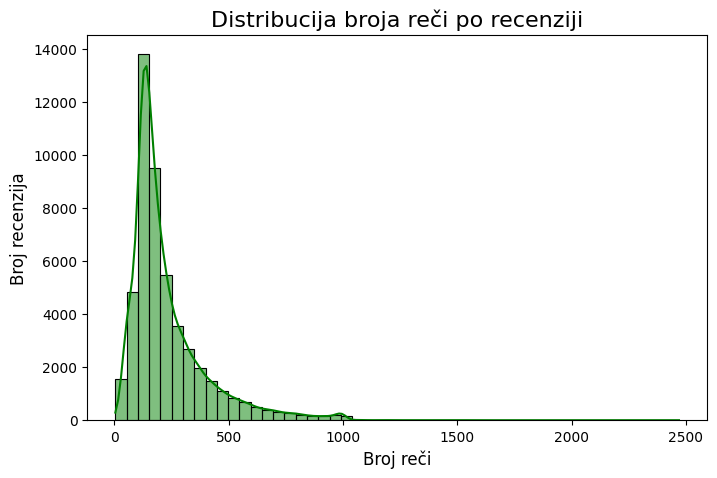

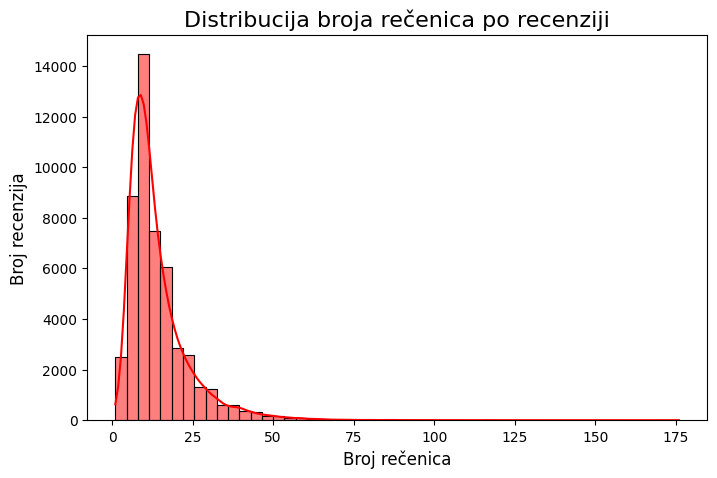

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Broj karaktera
plt.figure(figsize=(8,5))
sns.histplot(df['num_characters'], bins=50, kde=True, color='blue')
plt.title('Distribucija broja karaktera po recenziji', fontsize=16)
plt.xlabel('Broj karaktera', fontsize=12)
plt.ylabel('Broj recenzija', fontsize=12)
plt.show()

# Broj reči
plt.figure(figsize=(8,5))
sns.histplot(df['num_words'], bins=50, kde=True, color='green')
plt.title('Distribucija broja reči po recenziji', fontsize=16)
plt.xlabel('Broj reči', fontsize=12)
plt.ylabel('Broj recenzija', fontsize=12)
plt.show()

# Broj rečenica
plt.figure(figsize=(8,5))
sns.histplot(df['num_sentences'], bins=50, kde=True, color='red')
plt.title('Distribucija broja rečenica po recenziji', fontsize=16)
plt.xlabel('Broj rečenica', fontsize=12)
plt.ylabel('Broj recenzija', fontsize=12)
plt.show()


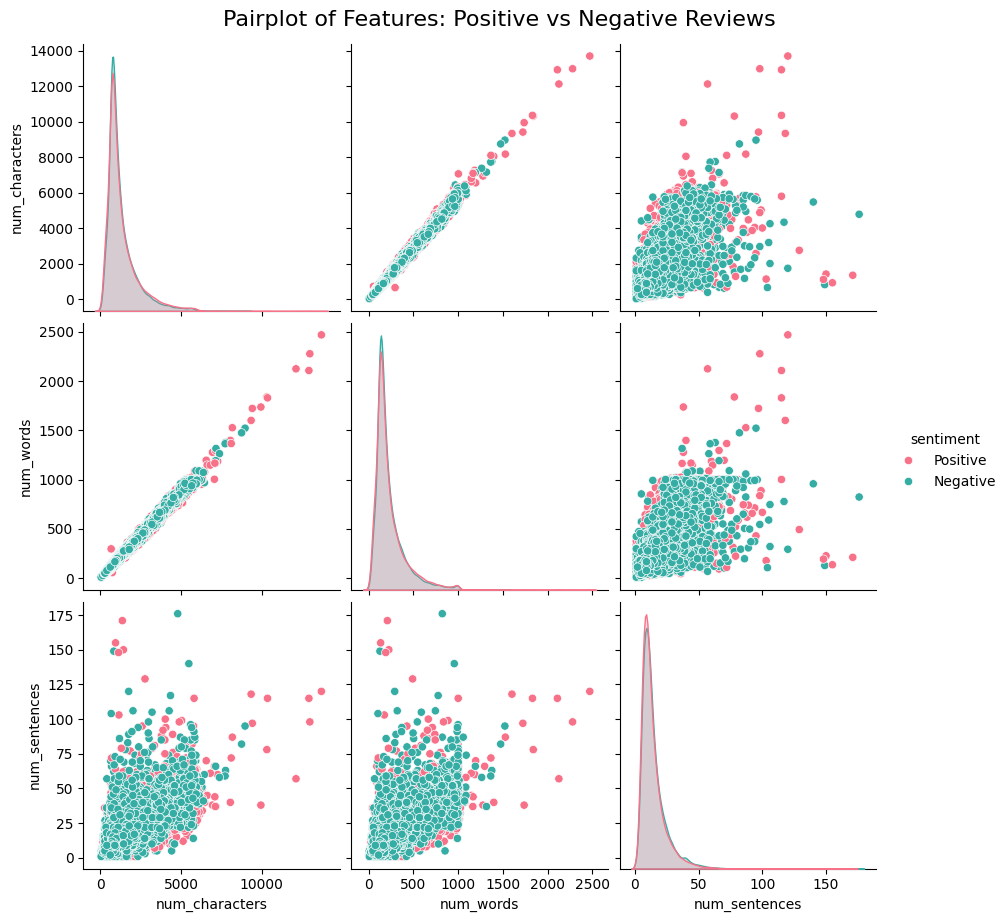

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Učitavanje svih review-ova iz train i test foldera
base_dirs = {
    'train': '/content/aclImdb/aclImdb/train',
    'test': '/content/aclImdb/aclImdb/test'
}
categories = ['pos', 'neg']

texts = []
labels = []

for dataset_type, base in base_dirs.items():
    for category in categories:
        dir_path = os.path.join(base, category)
        for fname in os.listdir(dir_path):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                    texts.append(f.read())
                labels.append(1 if category == 'pos' else 0)

# Kreiranje DataFrame-a
df = pd.DataFrame({'review': texts, 'label': labels})

# 2. Dodavanje novih kolona: broj karaktera, broj reči, broj rečenica
df['num_characters'] = df['review'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['num_words'] = df['review'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['num_sentences'] = df['review'].apply(lambda x: len(str(x).split('.')) if pd.notnull(x) else 0)

# 3. Dodavanje tekstualne kolone za sentiment
df['sentiment'] = df['label'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# 4. Pairplot za Positive vs Negative recenzije
sns.pairplot(
    df,
    hue='sentiment',  # Positive vs Negative
    vars=['num_characters', 'num_words', 'num_sentences'],  # Numeričke kolone
    palette='husl',  # Šarena paleta boja
    height=3
)

plt.suptitle("Pairplot of Features: Positive vs Negative Reviews", y=1.02, fontsize=16)
plt.show()


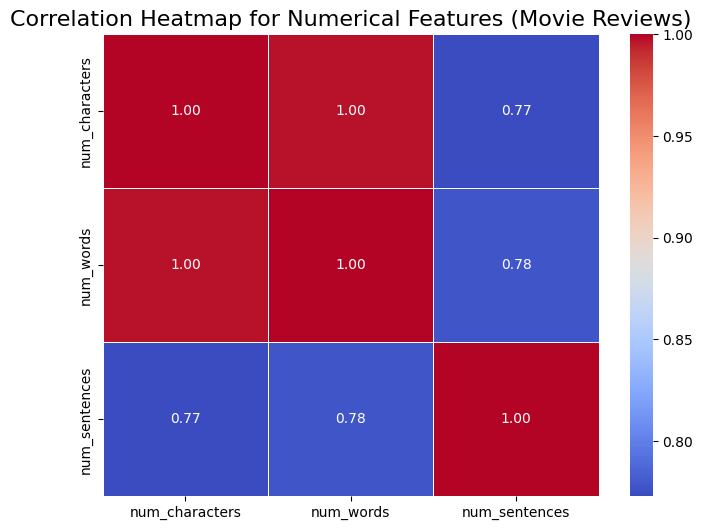

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Selektovanje samo numeričkih kolona
numeric_columns = df[['num_characters', 'num_words', 'num_sentences']]

# 2. Kreiranje korelacione matrice
correlation_matrix = numeric_columns.corr()

# 3. Plotovanje heatmap-e
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,           # Prikazivanje brojeva unutar kvadrata
    cmap='coolwarm',       # Paleta boja
    fmt='.2f',             # Format brojeva
    linewidths=0.5         # Razmaci između kvadrata
)

# 4. Naslov i prikaz
plt.title("Correlation Heatmap for Numerical Features (Movie Reviews)", fontsize=16)
plt.show()


Cleaning Text and Data Preprocessing


In [11]:
import re

def clean_text(text):
    text = text.lower()  # Mala slova
    text = re.sub(r'\d+', '', text)  # Izbaci brojeve
    text = re.sub(r'[^\w\s]', '', text)  # Izbaci interpunkciju
    text = re.sub(r'\s+', ' ', text).strip()  # Višestruki razmaci
    return text

import pandas as pd

df = pd.DataFrame({
    'text': texts,
    'label': labels
})



df['clean_text'] = df['text'].apply(clean_text)


df[['clean_text', 'label']].head()


,clean_text,label
0,this is not the stuff of soapoperas but the so...,1
1,passport to pimlico is a real treat for all fa...,1
2,it has been some years since i saw this but re...,1
3,i have been an admirer of edward burtynskys wo...,1
4,seemed to be a great year for satires duck sou...,1


In [12]:
import os

# Lokacija podataka
base_dir = '/content/aclImdb/aclImdb'

train_texts = []
train_labels = []

test_texts = []
test_labels = []

# Train podaci
for label_type in ['pos', 'neg']:
    dir_name = os.path.join(base_dir, 'train', label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                train_texts.append(f.read())
            train_labels.append(1 if label_type == 'pos' else 0)

# Test podaci
for label_type in ['pos', 'neg']:
    dir_name = os.path.join(base_dir, 'test', label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                test_texts.append(f.read())
            test_labels.append(1 if label_type == 'pos' else 0)

print(f"Broj train primera: {len(train_texts)}")
print(f"Broj test primera: {len(test_texts)}")


Broj train primera: 25000
Broj test primera: 25000


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)


X_train = vectorizer.fit_transform(train_texts)


X_test = vectorizer.transform(test_texts)


y_train = train_labels
y_test = test_labels

print(f"Veličina X_train: {X_train.shape}")
print(f"Veličina X_test: {X_test.shape}")


Veličina X_train: (25000, 5000)
Veličina X_test: (25000, 5000)


Modeli


Multinomial Naive Bayes

In [14]:
# ✅ 1. Importi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 2. Napravi TF-IDF + Naive Bayes pipeline
nb_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', MultinomialNB())
])

# ✅ 3. Treniraj model
nb_pipe.fit(train_texts, y_train)

# ✅ 4. Predikcije
y_pred_nb = nb_pipe.predict(test_texts)

# ✅ 5. Evaluacija
acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("🎯 Multinomial Naive Bayes")
print(f"Accuracy: {acc_nb:.4f}")
print(f"F1 score: {f1_nb:.4f}")
print("\nDetaljan izveštaj:")
print(classification_report(y_test, y_pred_nb))

🎯 Multinomial Naive Bayes
Accuracy: 0.8405
F1 score: 0.8405

Detaljan izveštaj:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [26]:
texts = [
    "Wonderful movie, I love it bro",
    "This was the worst movie ever.",
    "Some parts were okay, but it was mostly boring."
]

preds = nb_pipe.predict(texts)
probs = nb_pipe.predict_proba(texts)

label_map = {0: "negative", 1: "positive"}

for text, pred, prob in zip(texts, preds, probs):
    print(f"Text: {text}")
    print(f"Predicted sentiment: {label_map[pred]}, Probabilities: {prob}\n")


Text: Wonderful movie, I love it bro
Predicted sentiment: positive, Probabilities: [0.17219703 0.82780297]

Text: This was the worst movie ever.
Predicted sentiment: negative, Probabilities: [0.87695062 0.12304938]

Text: Some parts were okay, but it was mostly boring.
Predicted sentiment: negative, Probabilities: [0.75488882 0.24511118]



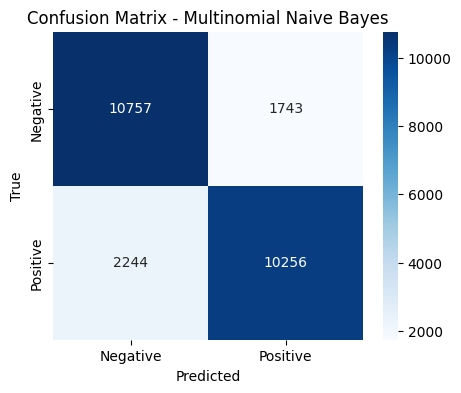

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predikcija
y_pred = model.predict(X_test)

# Evaluacija
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88264
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



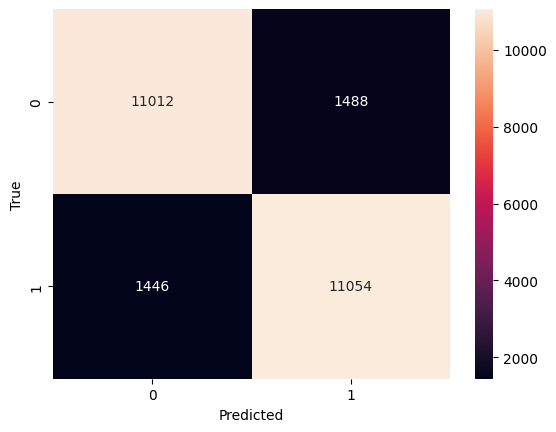

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



MLP MODEL

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np

# Pretvaranje sparse matrica u dense (ako koristiš TF-IDF)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

y_train = np.array(y_train)
y_test = np.array(y_test)

# Definisanje modela (veći + regularizacija)
model = keras.Sequential([
    Input(shape=(X_train_dense.shape[1],)),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),

    layers.Dense(1, activation='sigmoid')
])

# Kompajliranje (manji learning rate)
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback za early stopping (zaustavi ako se val_loss ne poboljšava)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Treniranje modela
history = model.fit(
    X_train_dense, y_train,
    epochs=30,           # više epoha
    batch_size=32,
    validation_data=(X_test_dense, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7531 - loss: 0.7315 - val_accuracy: 0.8756 - val_loss: 0.4509
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9030 - loss: 0.4030 - val_accuracy: 0.8757 - val_loss: 0.4361
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9117 - loss: 0.3770 - val_accuracy: 0.8718 - val_loss: 0.4445
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9155 - loss: 0.3617 - val_accuracy: 0.8748 - val_loss: 0.4417
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9262 - loss: 0.3471 - val_accuracy: 0.8741 - val_loss: 0.4487


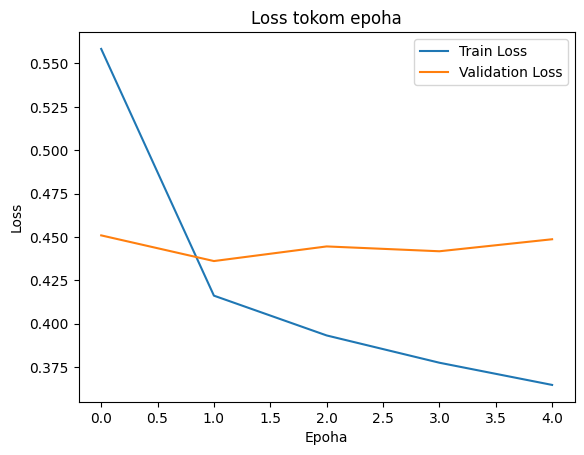

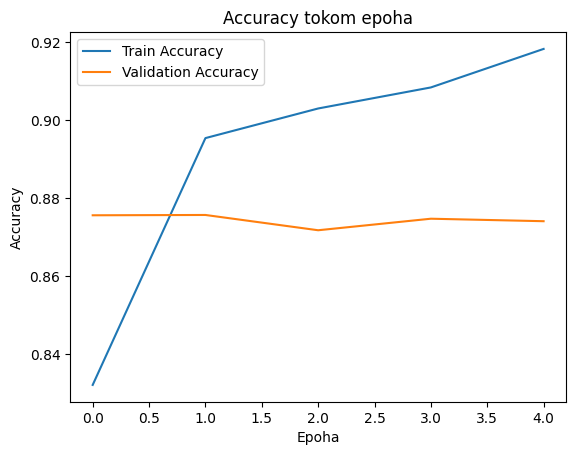

In [ ]:
import matplotlib.pyplot as plt

# Loss graf
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss tokom epoha')
plt.xlabel('Epoha')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy graf
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy tokom epoha')
plt.xlabel('Epoha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluacija modela
test_loss, test_acc = model.evaluate(X_test_dense, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8589 - loss: 0.4666
Test Loss: 0.43609702587127686
Test Accuracy: 0.8757200241088867


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


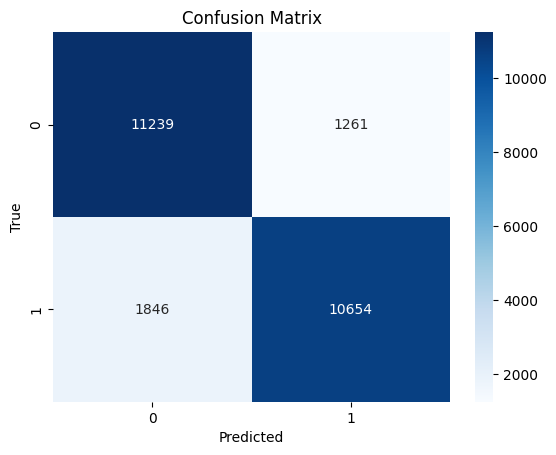

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_dense)
y_pred_classes = (y_pred > 0.5).astype("int32")  # jer imamo binarnu klasifikaciju

cm = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
